<a href="https://colab.research.google.com/github/ranjan2829/Quant/blob/main/Monte_Carlo_FInancial_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## This is required for pandas_datareader on google colab - then you need to restart runtime
!pip install --upgrade pandas_datareader


In [2]:
# Import dependencies
import math
import numpy as np
import pandas as pd
import datetime
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr


In [12]:
import datetime
import yfinance as yf
import numpy as np

def get_data(stocks, start, end):
    data = yf.download(stocks, start=start, end=end)['Close']
    returns = data.pct_change()
    means_return = returns.mean()
    cov_matrix = returns.cov()
    return means_return, cov_matrix

stklist = ['CBA', 'BHP', 'NAB', 'WBC', 'STO']
stks = [stock + '.AX' for stock in stklist]
end = datetime.datetime.now()
start = end - datetime.timedelta(days=300)
means_return, cov_matrix = get_data(stks, start, end)

weights = np.random.random(len(means_return))
weights /= np.sum(weights)


[*********************100%%**********************]  5 of 5 completed


In [15]:
monte=400
T=100

meanM=np.full(shape=(T,len(weights)),fill_value=means_return)
meanM=meanM.T

In [16]:
portfolio=np.full(shape=(T,monte),fill_value=0.0)
initial_p=10000

In [21]:
for m in range(0, monte):
    Z = np.random.normal(size=(T, len(weights)))#uncorrelated RV's
    L = np.linalg.cholesky(cov_matrix) #Cholesky decomposition to Lower Triangular Matrix
    dailyReturns = meanM + np.inner(L, Z) #Correlated daily returns for individual stocks
    portfolio[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initial_p


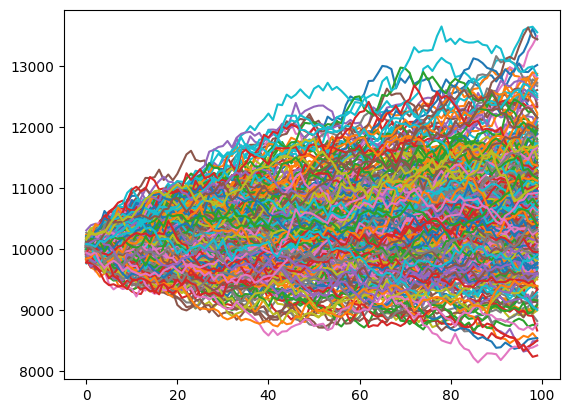

In [22]:
plt.plot(portfolio)

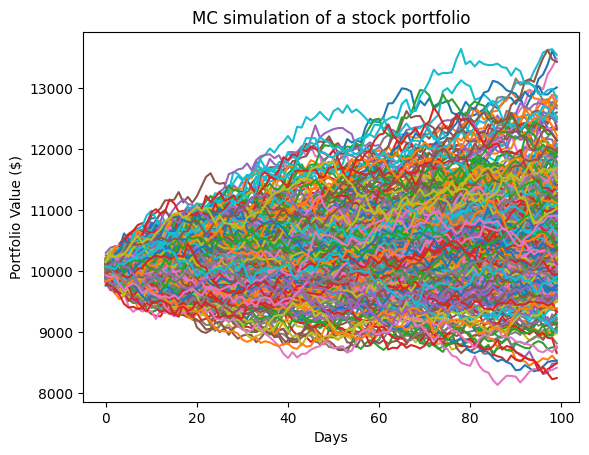

In [24]:

plt.plot(portfolio)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()


In [27]:
import pandas as pd
import numpy as np

def mcVar(returns, alpha=5):
    if isinstance(returns, pd.Series):
        return np.percentile(returns, alpha)
    else:
        raise TypeError("Input must be a pandas Series")

def mcCVar(returns, alpha=5):
    if isinstance(returns, pd.Series):
        belowVar = returns <= mcVar(returns, alpha=alpha)
        return returns[belowVar].mean()
    else:
        raise TypeError("Input must be a pandas Series")

# Example usage:
portfolio = np.array([[1, 2, 3, 4, 5]])  # Replace with your actual portfolio data
initial_p = 1000  # Replace with your actual initial portfolio value

port = pd.Series(portfolio[-1, :])
VaR = initial_p - mcVar(port, alpha=5)
CVaR = initial_p - mcCVar(port, alpha=5)

print('VaR_5 ${}'.format(round(VaR, 2)))
print('CVaR_5 ${}'.format(round(CVaR, 2)))


VaR_5 $998.8
CVaR_5 $999.0


In [28]:
# initial derivative parameters
S = 101.15          #stock price
K = 98.01           #strike price
vol = 0.0991        #volatility (%)
r = 0.01            #risk-free rate (%)
N = 10              #number of time steps
M = 1000            #number of simulations


In [29]:
market_value = 3.86 #market price of option
T = ((datetime.date(2022,3,17)-datetime.date(2022,1,17)).days+1)/365    #time in years
print(T)


0.1643835616438356


In [30]:
N=1
dt=T/N
nudt=(r-0.5*vol**2)*dt
volsdt=vol*np.sqrt(dt)
lns=np.log(S)

In [32]:
Z=np.random.normal(size=(N,M))
delta_lnst=nudt+volsdt*Z
lnst=lns+np.cumsum(delta_lnst,axis=0)

In [33]:
st=np.exp(lnst)
ct=np.maximum(0,st-K)

In [34]:
co=np.exp(-r*T)*np.sum(ct[-1])/M

In [35]:
sigma=np.sqrt(np.sum((ct[-1]-co)**2)/(M-1))


In [36]:
se=sigma/np.sqrt(M)

In [38]:
print("Call value is ${0} with SE +/- {1}".format(np.round(co,2),np.round(se,2)))

Call value is $3.71 with SE +/- 0.11


In [44]:
x1=np.linspace(co-3*se,co-1*se,100)
x2=np.linspace(co-1*se,co+1*se,100)
x3=np.linspace(co+1*se,co+3*se,100)



In [45]:
s1 = stats.norm.pdf(x1,co, se)
s2 = stats.norm.pdf(x2, co, se)
s3 = stats.norm.pdf(x3, co, se)


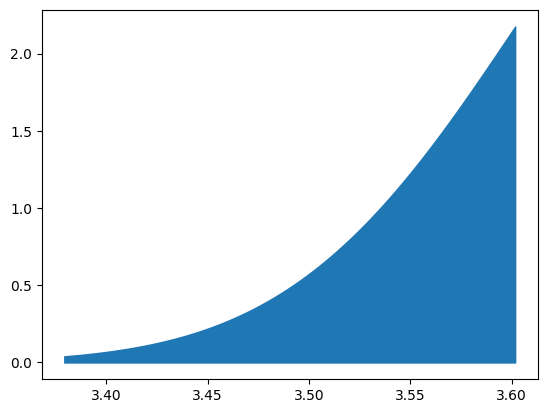

In [46]:
plt.fill_between(x1,s1,color='tab:blue',label='>StDev')

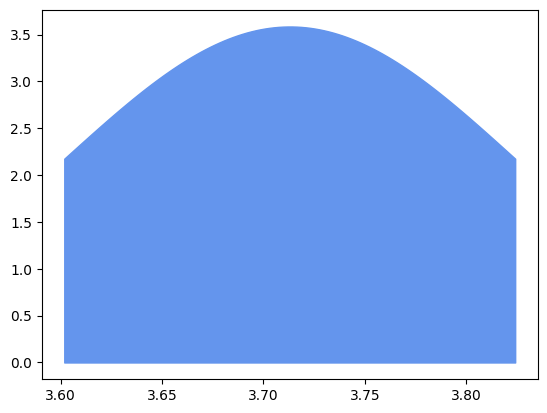

In [47]:
plt.fill_between(x2,s2,color='cornflowerblue',label='1 StDev')

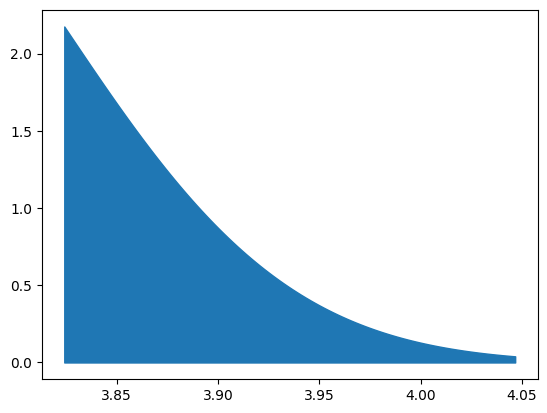

In [48]:
plt.fill_between(x3, s3, color='tab:blue')

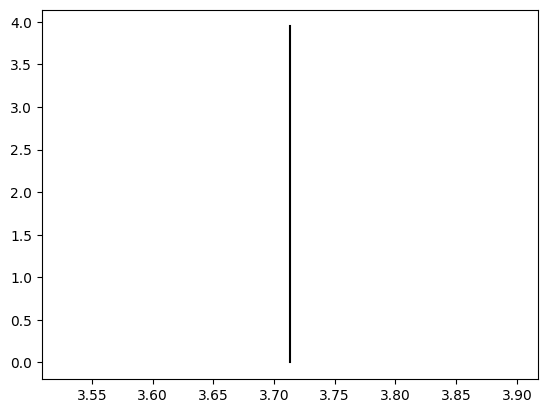

In [49]:
plt.plot([co,co],[0,max(s2)*1.1],
         'k',label='Theoritical value')

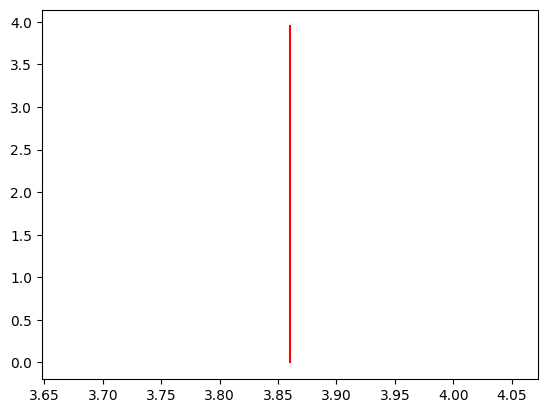

In [50]:
plt.plot([market_value,market_value],[0, max(s2)*1.1], 'r',
        label='Market Value')


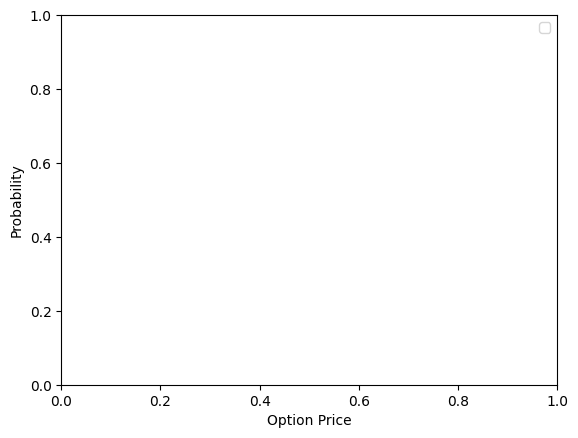

In [51]:

plt.ylabel("Probability")
plt.xlabel("Option Price")
plt.legend()
plt.show()

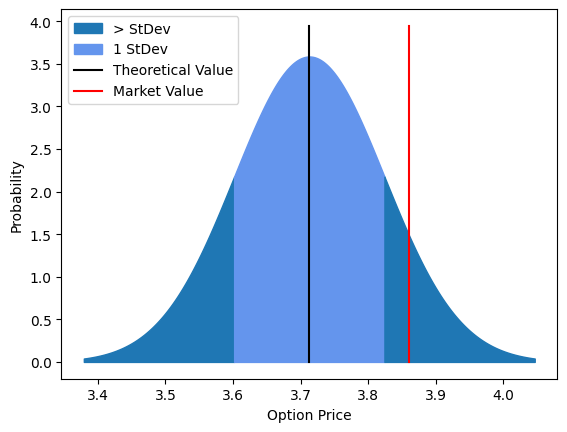

In [56]:
plt.fill_between(x1, s1, color='tab:blue',label='> StDev')
plt.fill_between(x2, s2, color='cornflowerblue',label='1 StDev')
plt.fill_between(x3, s3, color='tab:blue')

plt.plot([co,co],[0, max(s2)*1.1], 'k',
        label='Theoretical Value')
plt.plot([market_value,market_value],[0, max(s2)*1.1], 'r',
        label='Market Value')

plt.ylabel("Probability")
plt.xlabel("Option Price")
plt.legend()
plt.show()